<a href="https://colab.research.google.com/github/bimal-bp/Named_Entity_Recognition_-NER-_using_LSTMs.ipynb/blob/ML_MODELS/Named_Entity_Recognition_(NER)_using_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [102]:
df=pd.read_csv('/content/drive/MyDrive/ner_dataset.csv',encoding='latin1')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [103]:
df.isnull().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [104]:
# filling null values
df=df.fillna(method='ffill')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [105]:
print(df.columns)


Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')


In [106]:
print("Unique Words in corpus:",df['Word'].nunique())
print("Unique Tag in corpus:",df['Tag'].nunique())

Unique Words in corpus: 35178
Unique Tag in corpus: 17


In [107]:
# storing unique words and tags as a list
words=list(set(df['Word'].values))
words.append("ENDPAD")
num_words=len(words)
num_words

35179

In [108]:
tags=list(set(df['Tag'].values))
num_tag=len(tags)
num_tag

17

In [109]:
data=df.copy()

In [110]:
class sentencegetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].tolist(), s['POS'].tolist(), s['Tag'].tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(self.agg_func)
        self.sentences = [s for s in self.grouped]

    def agg_func(self, group):
        return [(w, p, t) for w, p, t in zip(group['Word'].tolist(), group['POS'].tolist(), group['Tag'].tolist())]


In [111]:
getter=sentencegetter(data)
sentences=getter.sentences

In [112]:
len(sentences)

47959

In [113]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [114]:
# maping between sentences and tags

word2idx={ w: i+1 for i,w in enumerate(words)}
tag2idx={ t: i for i,t in enumerate(tags)}

In [115]:
word2idx

{'Murghab': 1,
 'Typhoon': 2,
 'detentions': 3,
 'redenomination': 4,
 'privately-run': 5,
 'Rotterdam': 6,
 'living': 7,
 'carried': 8,
 'Qaida': 9,
 'Raikkonen': 10,
 'non-smokers': 11,
 'jeopardize': 12,
 'Program': 13,
 'determining': 14,
 'Yakaghund': 15,
 'Wannabe': 16,
 'American-made': 17,
 'raiding': 18,
 'Trevor': 19,
 'Restaurant': 20,
 'Ozcan': 21,
 'Pavel': 22,
 'REDD+': 23,
 'Limburg': 24,
 'Inga': 25,
 'rebuffed': 26,
 'rigging': 27,
 'interaction': 28,
 'Nurja': 29,
 'canceling': 30,
 'impacted': 31,
 'Tessa': 32,
 'phone': 33,
 'ABAC': 34,
 'results': 35,
 'mortification': 36,
 'wins': 37,
 'al-Qaida-in-Iraq': 38,
 'Malcolm': 39,
 'pushing': 40,
 'produced': 41,
 'sauna': 42,
 'exceeds': 43,
 'Rescuers': 44,
 'fallen': 45,
 'communication': 46,
 'abducted': 47,
 'O': 48,
 '2,400': 49,
 'liter': 50,
 'sterility': 51,
 'shortage': 52,
 'uncensored': 53,
 'eyewitness': 54,
 'Ethiopian': 55,
 'Tynychbek': 56,
 'Mawlawi': 57,
 'embankments': 58,
 'deeds': 59,
 'Warsaw': 60,

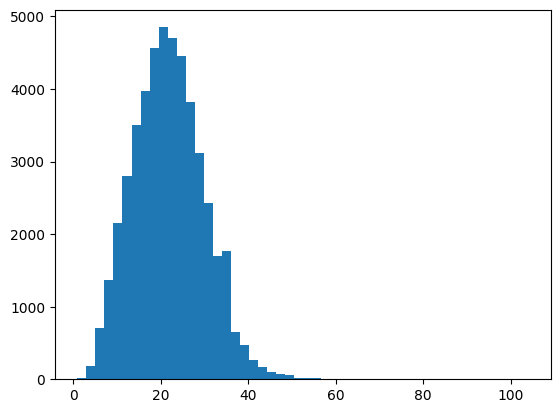

In [116]:
# padding inut sequences
plt.hist([len(s) for s in sentences],bins=50)
plt.show()

In [117]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


max_len = 50

X = [[word2idx[w[0]] for w in s]for s in sentences]
X = pad_sequences(maxlen = max_len , sequences =X, padding='post', value =num_words-1)

y = [[tag2idx[w[2]] for w in s]for s in sentences]
y = pad_sequences(maxlen = max_len , sequences =y, padding='post', value =tag2idx["O"])


In [118]:
from tensorflow.keras.utils import to_categorical

# Assuming you have already defined num_tags based on your unique tags
# num_tags = len(unique_tags)
# Calculate the number of unique tags based on your data
num_tags = len(set(tag for s in sentences for _, _, tag in s))

# One-hot encode the sequence labels
y = [to_categorical(i, num_classes=num_tags) for i in y]


In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=1)

In [119]:
# build and compile

from tensorflow.keras import models,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed,SpatialDropout1D,Bidirectional

In [120]:
from tensorflow.keras import models, layers

# Define the input layer
input_word = layers.Input(shape=(max_len,))

# Add an Embedding layer
model = layers.Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)

# Apply SpatialDropout1D
model = layers.SpatialDropout1D(0.1)(model)

# Add a Bidirectional LSTM layer
model = layers.Bidirectional(layers.LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)

# Apply TimeDistributed layer to the output
out = layers.TimeDistributed(layers.Dense(num_tags, activation='softmax'))(model)

# Define the model
model = models.Model(input_word, out)

# Display model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 50, 50)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 200)          120800    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 50, 17)           3417      
 tributed)                                                       
                                                           

In [121]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
!pip install livelossplot

In [123]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

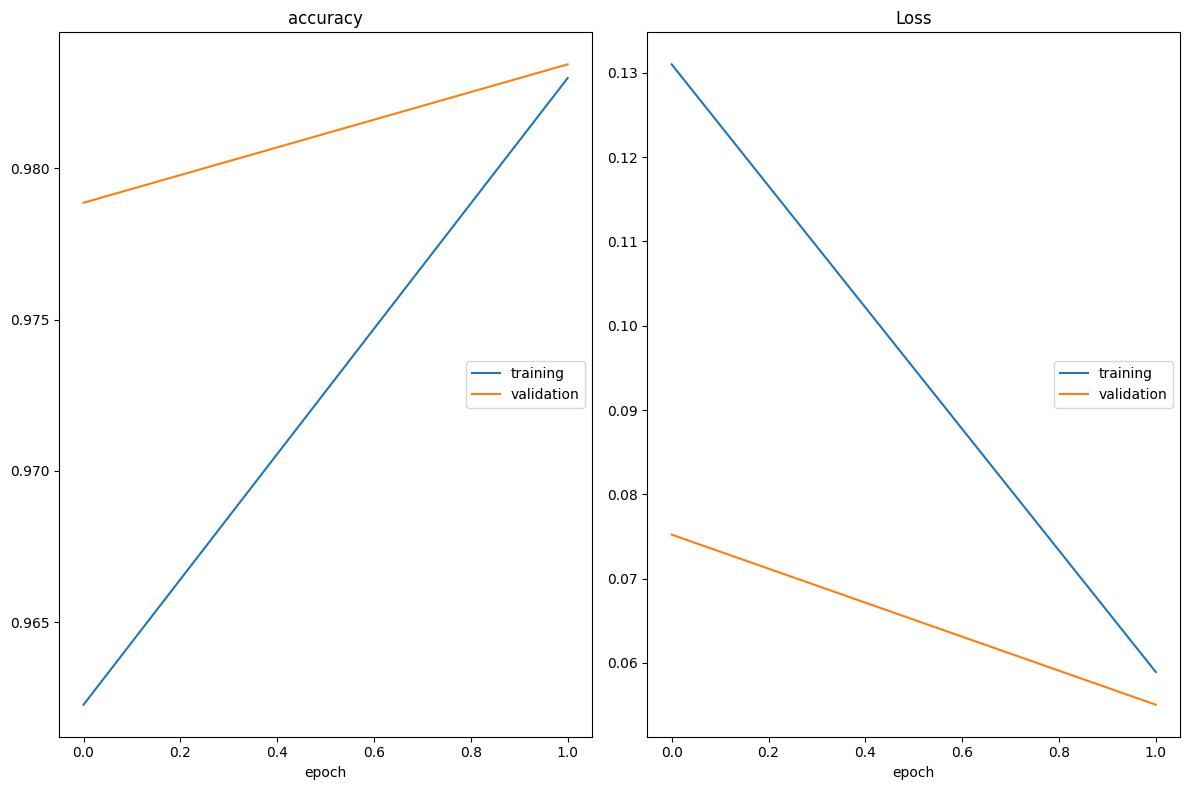

accuracy
	training         	 (min:    0.962, max:    0.983, cur:    0.983)
	validation       	 (min:    0.979, max:    0.983, cur:    0.983)
Loss
	training         	 (min:    0.059, max:    0.131, cur:    0.059)
	validation       	 (min:    0.055, max:    0.075, cur:    0.055)
540/540 [==============================] - 195s 362ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.0550 - val_accuracy: 0.9834


In [127]:
early_stopping=EarlyStopping(monitor='val_accuracy',patience=1,verbose=0,mode='max',restore_best_weights=False)
callbacks=[PlotLossesCallback(),early_stopping]

history=model.fit(
    x_train,np.array(y_train),
    validation_split=0.2,
    batch_size=64,
    epochs=2,
    verbose=1,
    callbacks=callbacks
)

In [128]:
model.evaluate(x_test,np.array(y_test))

150/150 [==============================] - 8s 54ms/step - loss: 0.0577 - accuracy: 0.9834


[0.05770384520292282, 0.9834237098693848]

In [129]:

i = np.random.randint(0, x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)

y_true = np.argmax(np.array(y_test), axis=-1)[i]
print("{:15}{:5}\t {}\n".format("Word","True","Pred"))
print("-"*30)
for w,true,pred in zip(x_test[i], y_true, p[0]):
  print("{:15}{:5}\t{}".format(words[w-1], tags[true],tags[pred]))

1/1 [==============================] - 1s 555ms/step
Word           True 	 Pred

------------------------------
The            O    	O
Army           B-org	B-org
Corps          I-org	I-org
of             I-org	I-org
Engineers      I-org	I-org
says           O    	O
20             O    	O
levees         O    	O
in             O    	O
the            O    	O
central        O    	O
U.S.           B-geo	B-geo
have           O    	O
already        O    	O
overflowed     O    	O
-              O    	O
and            O    	O
up             O    	O
to             O    	O
30             O    	O
more           O    	O
are            O    	O
in             O    	O
danger         O    	O
of             O    	O
overflowing    O    	O
.              O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O    	O
harshest       O 